# Normal Distribution

In [1]:
from scipy import stats

In [2]:
stats.norm.cdf(70,loc=60,scale=10)

0.8413447460685429

In [3]:
stats.norm.cdf(680, loc=711, scale = 29)

0.14254260383881612

In [4]:
stats.norm.cdf(740,loc=711,scale=29) - stats.norm.cdf(697,loc=711,scale=29)

0.5267111786415019

In [5]:
import pandas as pd
import numpy as np

In [7]:
beml_df = pd.read_csv("BEML.csv")
beml_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1121.0,1151.00,1121.00,1134.0,1135.60,101651.0,1157.18
1,2010-01-05,1146.8,1149.00,1128.75,1135.0,1134.60,59504.0,676.47
2,2010-01-06,1140.0,1164.25,1130.05,1137.0,1139.60,128908.0,1482.84
3,2010-01-07,1142.0,1159.40,1119.20,1141.0,1144.15,117871.0,1352.98
4,2010-01-08,1156.0,1172.00,1140.00,1141.2,1144.05,170063.0,1971.42


In [8]:
glaxo_df = pd.read_csv("GLAXO.csv")
glaxo_df[0:5]

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2010-01-04,1613.00,1629.10,1602.00,1629.0,1625.65,9365.0,151.74
1,2010-01-05,1639.95,1639.95,1611.05,1620.0,1616.80,38148.0,622.58
2,2010-01-06,1618.00,1644.00,1617.00,1639.0,1638.50,36519.0,595.09
3,2010-01-07,1645.00,1654.00,1636.00,1648.0,1648.70,12809.0,211.00
4,2010-01-08,1650.00,1650.00,1626.55,1640.0,1639.80,28035.0,459.11


In [9]:
beml_df = beml_df[['Date','Close']]
glaxo_df = glaxo_df[['Date','Close']]

In [10]:
beml_df

,Date,Close
0,2010-01-04,1135.60
1,2010-01-05,1134.60
2,2010-01-06,1139.60
3,2010-01-07,1144.15
4,2010-01-08,1144.05
...,...,...
1734,2016-12-26,950.25
1735,2016-12-27,975.70
1736,2016-12-28,974.40
1737,2016-12-29,986.05


In [11]:
glaxo_df = glaxo_df.set_index(pd.DatetimeIndex(glaxo_df['Date']))
beml_df = beml_df.set_index(pd.DatetimeIndex(beml_df['Date']))

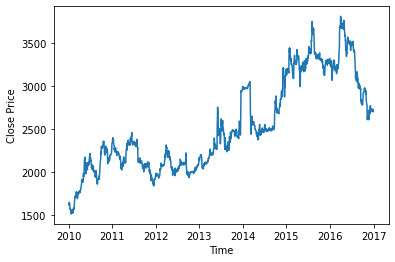

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(glaxo_df.Close);
plt.xlabel('Time');
plt.ylabel('Close Price');

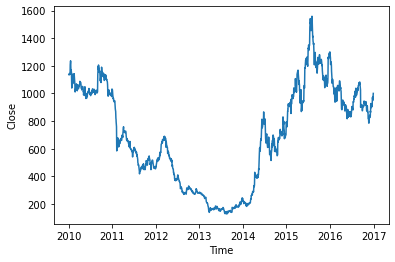

In [18]:
plt.plot(beml_df.Close);
plt.xlabel('Time');
plt.ylabel('Close');

In [23]:
glaxo_df['gain'] = glaxo_df.Close.pct_change(periods = 1)
beml_df['gain'] = beml_df.Close.pct_change(periods = 1)

In [24]:
glaxo_df = glaxo_df.dropna()
beml_df = beml_df.dropna()

Text(0, 0.5, 'Gain')

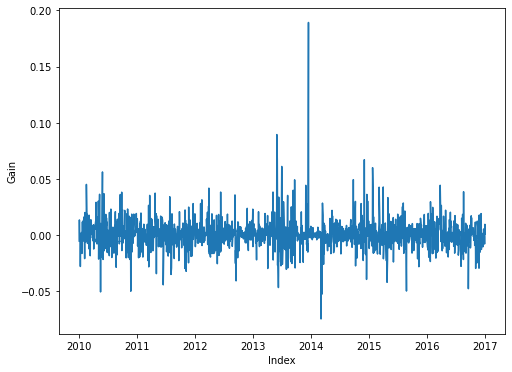

In [25]:
plt.figure(figsize = (8,6));
plt.plot(glaxo_df.index, glaxo_df.gain)
plt.xlabel('Index')
plt.ylabel('Gain')

Text(0, 0.5, 'Gain')

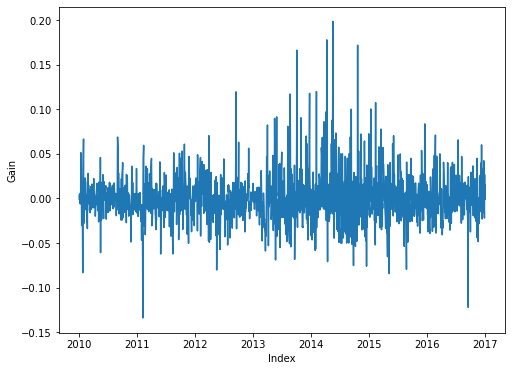

In [34]:
plt.figure(figsize = (8,6));
plt.plot(beml_df.index, beml_df.gain)
plt.xlabel('Index')
plt.ylabel('Gain')

C:\Users\Bharadwaj\anaconda3-updated\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


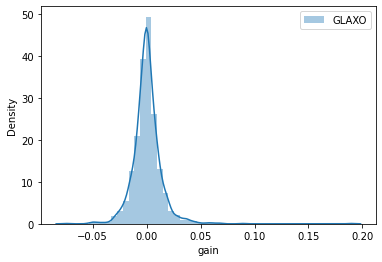

In [26]:
import seaborn as sn
sn.distplot(glaxo_df.gain, label = "GLAXO")
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

C:\Users\Bharadwaj\anaconda3-updated\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


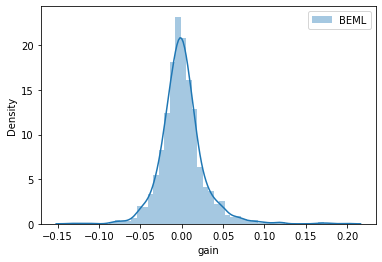

In [27]:
sn.distplot(beml_df.gain, label = "BEML")
plt.xlabel('gain')
plt.ylabel('Density')
plt.legend()

In [28]:
print('Mean : ', round(glaxo_df.gain.mean(),4))
print('Standard Deviation : ', round(glaxo_df.gain.std(),4))

Mean :  0.0004
Standard Deviation :  0.0134


In [29]:
print('Mean : ', round(beml_df.gain.mean(),4))
print('Standard Deviation : ', round(beml_df.gain.std(),4))

Mean :  0.0003
Standard Deviation :  0.0264


In [30]:
#Probability of making 2% loss or higher in GLAXO
stats.norm.cdf(-0.02,
              loc = glaxo_df.gain.mean(),
              scale = glaxo_df.gain.std())

0.06352488667177397

In [31]:
#Probability of making 2% gain or higher in GLAXO
1 - stats.norm.cdf(-0.02,
              loc = glaxo_df.gain.mean(),
              scale = glaxo_df.gain.std())

0.9364751133282261

In [32]:
#Probability of making 2% loss or higher in BEML
stats.norm.cdf(-0.02,
              loc = beml_df.gain.mean(),
              scale = beml_df.gain.std())

0.22155987503755292

In [33]:
#Probability of making 2% gain or higher in BEML
1 - stats.norm.cdf(-0.02,
              loc = beml_df.gain.mean(),
              scale = beml_df.gain.std())

0.7784401249624471

# Confidence Interval

In [37]:
stats.norm.ppf(.975)

1.959963984540054

In [38]:
stats.t.ppf(0.975,139)

1.977177724476122

In [39]:
stats.norm.ppf(.995)

2.5758293035489004

In [40]:
beml_df_ci = stats.norm.interval(0.975,
                                 loc = beml_df.gain.mean(),
                                 scale = beml_df.gain.std())
print('Gain at 95% is ', np.round(beml_df_ci, 4))

Gain at 95% is  [-0.059   0.0595]


In [36]:
glaxo_df_ci = stats.norm.interval(0.95,
                                 loc = glaxo_df.gain.mean(),
                                 scale = glaxo_df.gain.std())
print('Gain at 90% is ', np.round(glaxo_df_ci, 4))

Gain at 90% is  [-0.0258  0.0266]
